# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

Matplotlib is building the font cache; this may take a moment.


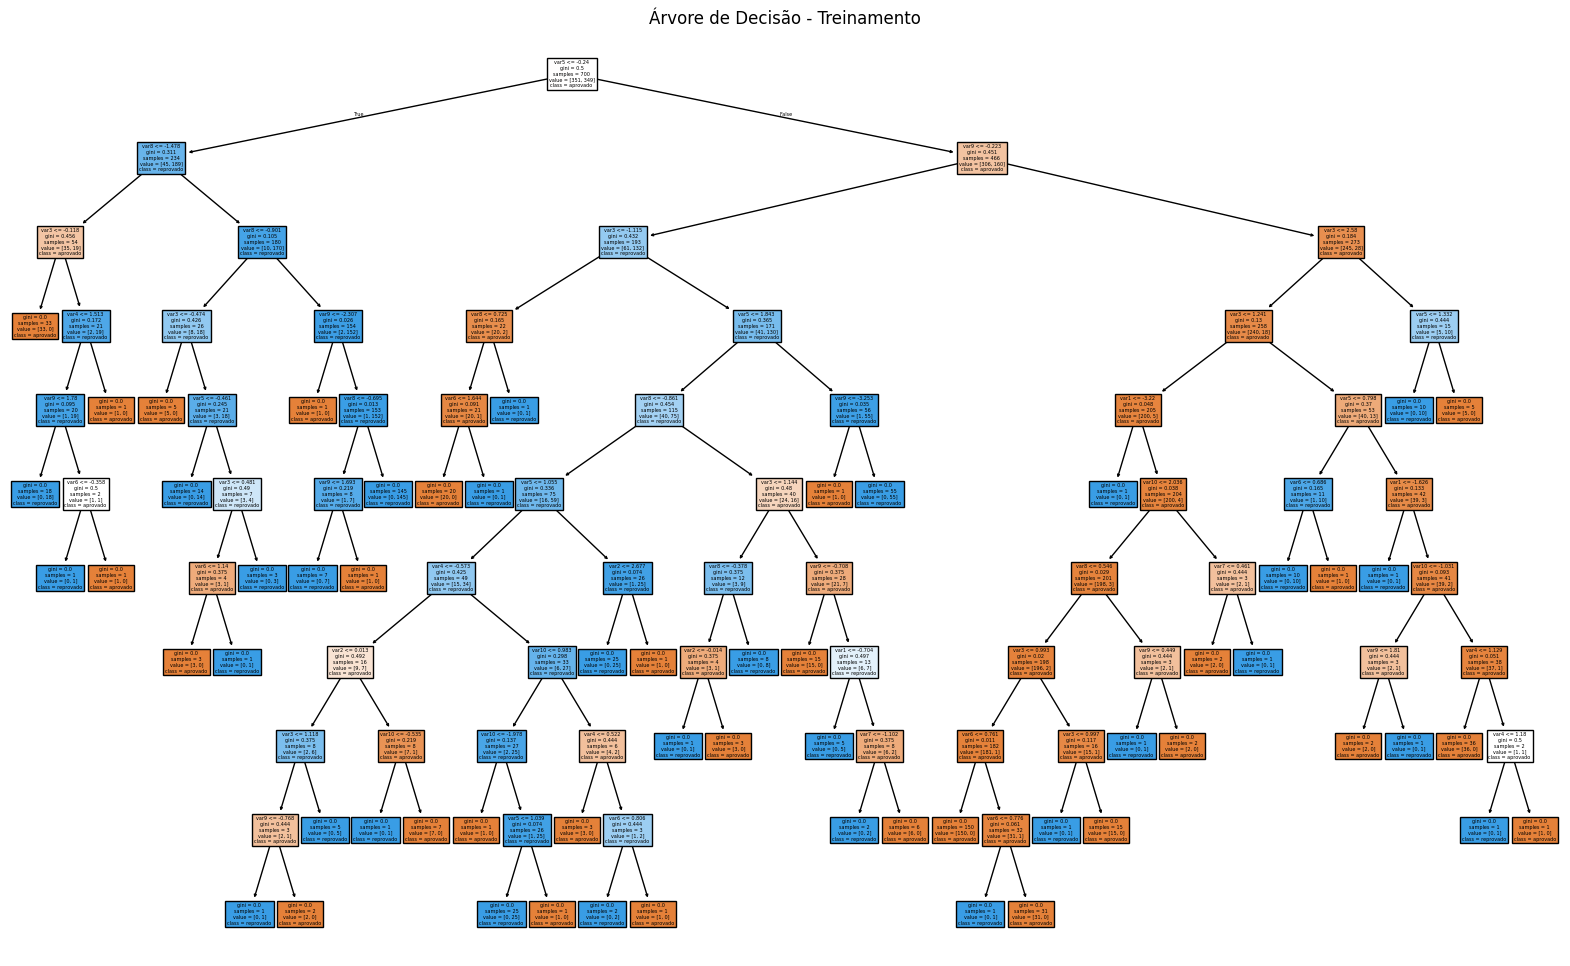

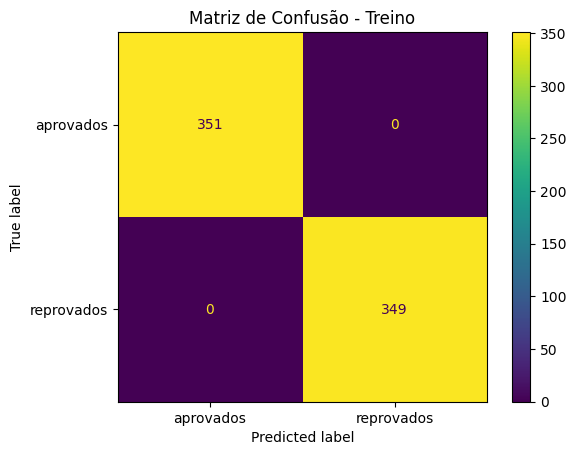

Acurácia no treino: 1.0000


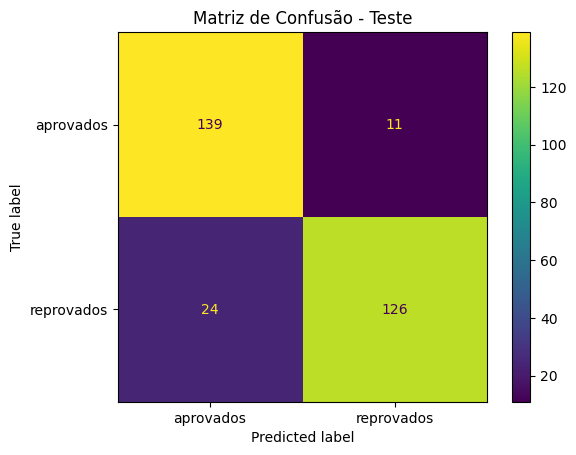

Acurácia no teste: 0.8833


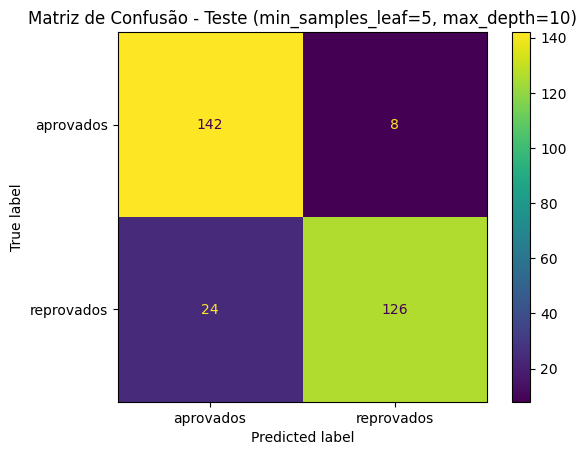

Proporção de proponentes classificados como "maus": 0.4467
Acurácia classificando todos como bons: 0.5000


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Gerar base sintética para classificação binária (aprovado/reprovado)
X, y = make_classification(n_samples=1000,    # 1000 amostras
                           n_features=10,     # 10 variáveis preditoras
                           n_informative=5,   # 5 úteis para definir classe
                           n_redundant=0,
                           n_classes=2,       # Classes 0 e 1
                           random_state=42)

# Transformar em DataFrame para facilitar visualização e manipulação
df = pd.DataFrame(X, columns=[f'var{i}' for i in range(1, 11)])
df['inadimplente'] = y

# Separar variáveis explicativas e target
X = df.drop(columns=['inadimplente'])
y = df['inadimplente']

# Dividir em treino e teste (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Definir e treinar a árvore de decisão (padrão)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Visualizar árvore
plt.figure(figsize=(20,12))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['aprovado', 'reprovado'])
plt.title('Árvore de Decisão - Treinamento')
plt.show()

# Matriz de confusão no treino
y_train_pred = clf.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(cm_train, display_labels=['aprovados', 'reprovados'])
disp_train.plot()
plt.title('Matriz de Confusão - Treino')
plt.show()

print(f'Acurácia no treino: {accuracy_score(y_train, y_train_pred):.4f}')

# Avaliar no teste
y_test_pred = clf.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=['aprovados', 'reprovados'])
disp_test.plot()
plt.title('Matriz de Confusão - Teste')
plt.show()

print(f'Acurácia no teste: {accuracy_score(y_test, y_test_pred):.4f}')

# Treinar árvore com min_samples_leaf=5 e max_depth=10
clf2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf2.fit(X_train, y_train)

y_test_pred2 = clf2.predict(X_test)
cm_test2 = confusion_matrix(y_test, y_test_pred2)
disp_test2 = ConfusionMatrixDisplay(cm_test2, display_labels=['aprovados', 'reprovados'])
disp_test2.plot()
plt.title('Matriz de Confusão - Teste (min_samples_leaf=5, max_depth=10)')
plt.show()

# Proporção classificados como 'maus' (classe 1)
prop_maus = np.mean(y_test_pred2 == 1)
print(f'Proporção de proponentes classificados como "maus": {prop_maus:.4f}')

# Acurácia classificando todos como bons (classe 0)
y_test_all_bons = np.zeros(len(y_test))
acc_all_bons = accuracy_score(y_test, y_test_all_bons)
print(f'Acurácia classificando todos como bons: {acc_all_bons:.4f}')


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

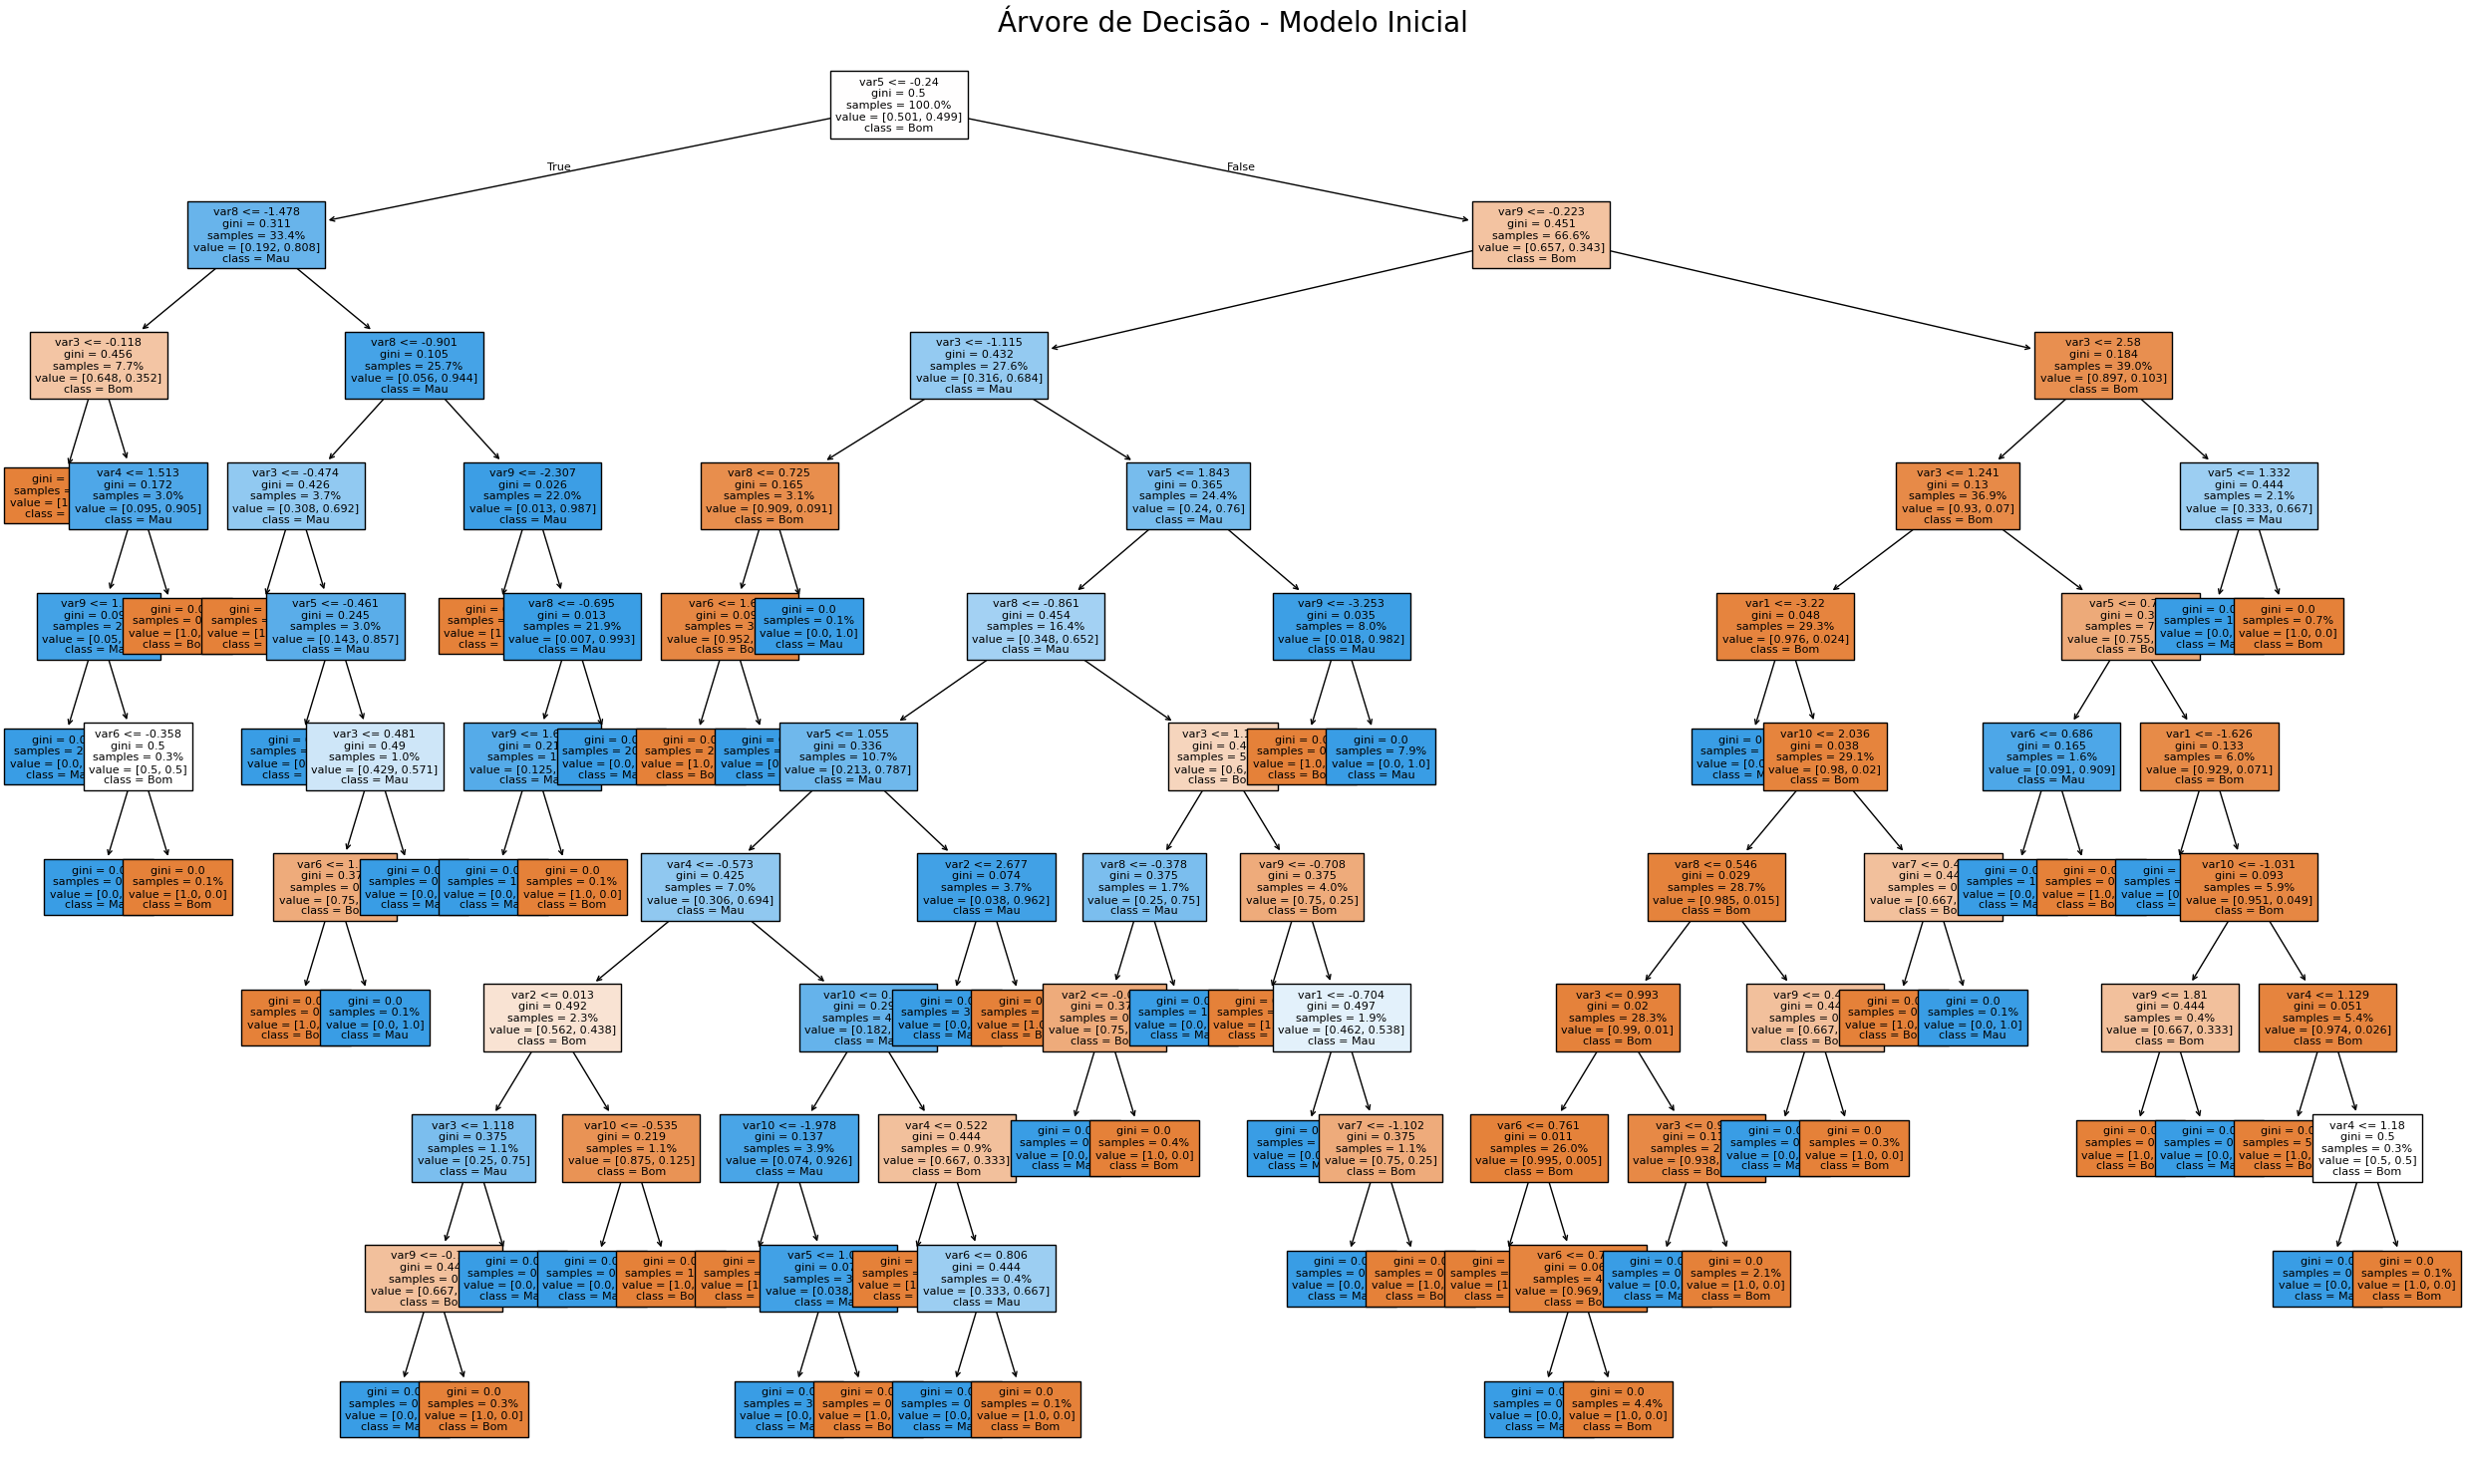

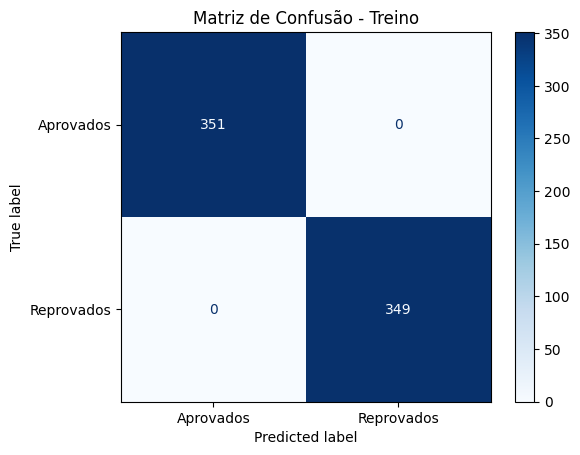

2.5) Acurácia na base de treinamento: 1.0000


In [2]:
# 2) Modelagem com Árvore de Decisão
# 2.1 Definir o objeto da árvore de decisão
clf = DecisionTreeClassifier(random_state=42)

# 2.2 Treinar o modelo
clf.fit(X_train, y_train)

# 2.3 Visualizar a árvore
plt.figure(figsize=(25, 15))
plot_tree(
    clf,
    filled=True,
    feature_names=X.columns,
    class_names=['Bom', 'Mau'],
    proportion=True,
    fontsize=8
)
plt.title('Árvore de Decisão - Modelo Inicial', fontsize=20)
plt.tight_layout()
plt.savefig('arvore_decisao.png', dpi=300)
plt.show()

# 2.4 Matriz de classificação para treino
y_pred_train = clf.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(
    confusion_matrix=cm_train,
    display_labels=['Aprovados', 'Reprovados']
)
disp_train.plot(cmap='Blues')
plt.title('Matriz de Confusão - Treino')
plt.grid(False)
plt.savefig('matriz_confusao_treino.png')
plt.show()

# 2.5 Calcular a acurácia na base de treinamento (ITEM 2.5)
acuracia_train = accuracy_score(y_train, y_pred_train)
print(f"2.5) Acurácia na base de treinamento: {acuracia_train:.4f}")

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

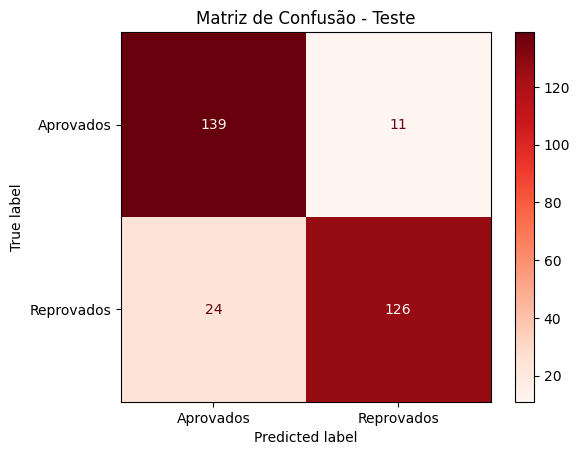

3.3) Acurácia no teste: 0.8833
    Diferença (treino - teste): 0.1167
3.4) Proporção de reprovados: 0.4467


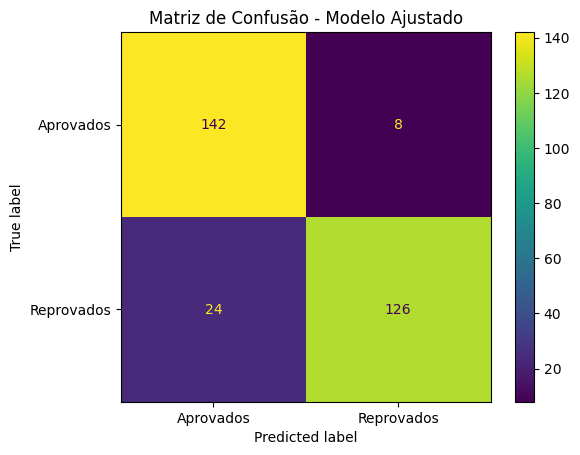

3.5) Acurácia se todos fossem aprovados: 0.5000

Resumo de Desempenho:
Modelo inicial (treino): 1.0000
Modelo inicial (teste): 0.8833
Modelo ajustado (teste): 0.8933
Classificar todos como bons: 0.5000
Proporção de reprovados no modelo ajustado: 0.4467


In [3]:
# 3) Avaliação no conjunto de teste
# 3.1 Classificar a base de teste
y_pred_test = clf.predict(X_test)

# 3.2 Matriz de confusão para teste
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(
    confusion_matrix=cm_test,
    display_labels=['Aprovados', 'Reprovados']
)
disp_test.plot(cmap='Reds')
plt.title('Matriz de Confusão - Teste')
plt.grid(False)
plt.savefig('matriz_confusao_teste.png')
plt.show()

# 3.3 Calcular acurácia no teste e comparar com treino
acuracia_test = accuracy_score(y_test, y_pred_test)
print(f"3.3) Acurácia no teste: {acuracia_test:.4f}")
print(f"    Diferença (treino - teste): {acuracia_train - acuracia_test:.4f}")

# 3.4 Nova árvore com parâmetros ajustados
clf_ajustado = DecisionTreeClassifier(
    min_samples_leaf=5,
    max_depth=10,
    random_state=123
)
clf_ajustado.fit(X_train, y_train)

# Previsões com modelo ajustado
y_pred_ajustado = clf_ajustado.predict(X_test)

# Proporção de reprovados (classificados como 'maus')
prop_reprovados = (y_pred_ajustado == 1).mean()
print(f"3.4) Proporção de reprovados: {prop_reprovados:.4f}")

# Matriz de confusão do modelo ajustado
cm_ajustado = confusion_matrix(y_test, y_pred_ajustado)
disp_ajustado = ConfusionMatrixDisplay(
    confusion_matrix=cm_ajustado,
    display_labels=['Aprovados', 'Reprovados']
)
disp_ajustado.plot(cmap='viridis')
plt.title('Matriz de Confusão - Modelo Ajustado')
plt.grid(False)
plt.savefig('matriz_confusao_ajustada.png')
plt.show()

# 3.5 Acurácia se todos fossem aprovados
y_pred_all_good = np.zeros_like(y_test)  # Todos classificados como 0 (bons)
acuracia_all_good = accuracy_score(y_test, y_pred_all_good)
print(f"3.5) Acurácia se todos fossem aprovados: {acuracia_all_good:.4f}")

# Análise comparativa final
print("\nResumo de Desempenho:")
print(f"Modelo inicial (treino): {acuracia_train:.4f}")
print(f"Modelo inicial (teste): {acuracia_test:.4f}")
print(f"Modelo ajustado (teste): {accuracy_score(y_test, y_pred_ajustado):.4f}")
print(f"Classificar todos como bons: {acuracia_all_good:.4f}")
print(f"Proporção de reprovados no modelo ajustado: {prop_reprovados:.4f}")